# Data Analysis of Box Office Trends in the 21st Century

## Overview

This notebook imports the processed data from the Data Exploration notebook in order to analyze current movie trends on behalf of Microsoft's new movie studio. By putting an emphasis on the median ROI% value of movie data from a number of movie database websites, as well as by creating a list of the most popular movies, evaluation of financial performance and the risk involved was carried out and recommendations based on these findings were made. A focus on large budget movies with particular genre elements released at the appropriate time of the year will ensure the best chance of success at the box office for Microsoft.

## Business Problem
This project covers the following hypothetical:
Microsoft wants to create a new movie studio and decided to hire me to conduct data analysis to determine what films are currently performing the best at the box office. Using multiple datasets from a number of movie databases, expected returns and risk as well as expected cost and how to best utilize recourses can be determined through anaylsis. As the newcomer to a crowded realm, further analysis was conducted to ensure a well recieved debut movie and to set the standard for the quality of it's future films.  

## Data Modeling

The primary focus will be on financial success in terms of performance at the box office. Return on Investment was determined to be a key variable in analyzing different metrics of the box office data in order to properly advice Microsoft. The first big question to pose in order to advise on the problem of box office success is the following:

**1. What are the expected returns from creating a movie given current movie trends? What is the risk involved?**

The second question that would naturally follow would have to involve the cost of movies. Therefore, by looking at return on investment vs movie budgets:

**2. How much money should Microsoft expect to spend? How does the cost of a film relate to expected returns? How should money be allocated to ensure the best chance for success?**

One more financial question to consider involves the seasonality of expected returns for blockbuster movies:

**3. When should Microsoft release a new movie?**


While focusing on ROI percentages is a great metric for considering financial success of a buisness venture, I believe it is also important to consider the public's perception of a film. The following questions focus on the makeup of the top 250 movies of this century in a list that closely mimics how the IMDb website interprets the same data. There is only one chance to make a great first impression, and with a company as big as Microsoft entering the field, there will be a lot of eyes watching their debut and even more expectations. Thus, it is very important to set the bar high for their movie studio right from the start by answering the following questions:

**4. What type of Movie is the most popular? What genre should we focus on for our debut film? What Directors and Writers worked on the most popular films?**


In [1]:
#import appropriate libraries

import numpy as np
import pandas as pd
import re
import seaborn as sns
sns.set_style(style='darkgrid')  #style visuals
sns.set_context(context='talk')  #resize plots for presentation
import sqlite3
import matplotlib
import matplotlib.pyplot as plt
from pandasql import sqldf
%matplotlib inline

In [2]:
ls cleanedData

IMDb_weighted.csv       genreCounts             top250_writers.csv
cleanedBOM.csv          mergedBudgetTables.csv  top250df.csv
cleanedTN.csv           top250_directors.csv


In [3]:
df_tn_bom = pd.read_csv('cleanedData/mergedBudgetTables.csv')

In [4]:
df_tn_bom.drop(columns='index', inplace=True)

In [5]:
display(df_tn_bom.head())
df_tn_bom.info()

,id,release_date,movie,production_budget,worldwide_gross,release_year,release_month,ROI,net_revenue,studio
0,1,2009-12-18,Avatar,425000000,2776345279,2009,12,553.26,2351345279,NaN
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,2011,5,154.67,635063875,BV
2,3,2019-06-07,Dark Phoenix,350000000,149762350,2019,6,-57.21,-200237650,NaN
3,4,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,2015,5,324.38,1072413963,BV
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,2017,12,315.37,999721747,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4044 non-null   int64  
 1   release_date       4044 non-null   object 
 2   movie              4044 non-null   object 
 3   production_budget  4044 non-null   int64  
 4   worldwide_gross    4044 non-null   int64  
 5   release_year       4044 non-null   int64  
 6   release_month      4044 non-null   int64  
 7   ROI                4044 non-null   float64
 8   net_revenue        4044 non-null   int64  
 9   studio             1322 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 316.1+ KB


### Current trend for expected ROI

In [6]:
df_tn_bom['ROI'].describe()

count     4044.000000
mean       264.533029
std       1311.652581
min        -99.990000
25%        -34.802500
50%         77.225000
75%        261.657500
max      43051.790000
Name: ROI, dtype: float64

Currently, with a mean almost 3.5X larger than the median and a standard deviation of 1311.65, the data for visualizing ROI% has a fairly large margin of error. The visualization I was intending to make to quickly visualize the risk and potetional returns for getting into the movie industry, it would make sense to clean things up by using quartile ranges. Not only will the visualizations be easier to read and more visually appealing by removing outliers, the data will be normally distrubited and therefore more predictive by simpler models.  

In [7]:
#write function to filter data based on quartile ranges
def Remove_Outlier_Indices(df):   
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

#removing data outside the Inner Quartile Range is a common technique for dealing with outliers
#normalize the distrubtion of the data to plot observations on manageable scale

In [8]:
nonOutlierListROI = Remove_Outlier_Indices(df_tn_bom['ROI'])

In [9]:
dfSubsetROI = df_tn_bom[nonOutlierListROI] #subset of budget data to plot a clean plot less influenced by outliers

**1. What are the expected returns from creating a movie given current movie trends? What is the risk involved?**

Below is the final presentation of Profitability of Film Production by Year in the 21st Century by use of a boxplot. The distrubtion of returns is displayed by year in order to evaluate current trends for the risk and expected returns for producing a movie today. 

A line for the median of the data was added to clearly visualize the behavior of ROI% year to year. It is clear in the figure that up until 2015, the expected returns for a film was increasing year over year with a small amount of variance. However, after 2015 it seems that the median values started to look almost sinosal, meaning a greater amount of variance and risk. Still, every single year had a median value that was positive, with a minimum value of 21.55% expected returns for producing a movie in 2015. 

Overall, based on the overall trend and median of the dataset, one could expect a return of 77.23% on their initial investment. 

There is a clear financial incentive for entering the movie industry. However, to make more sense of the distrubtion of expected returns on investment, it is very important to look at cost. This will be the focus for the next section.

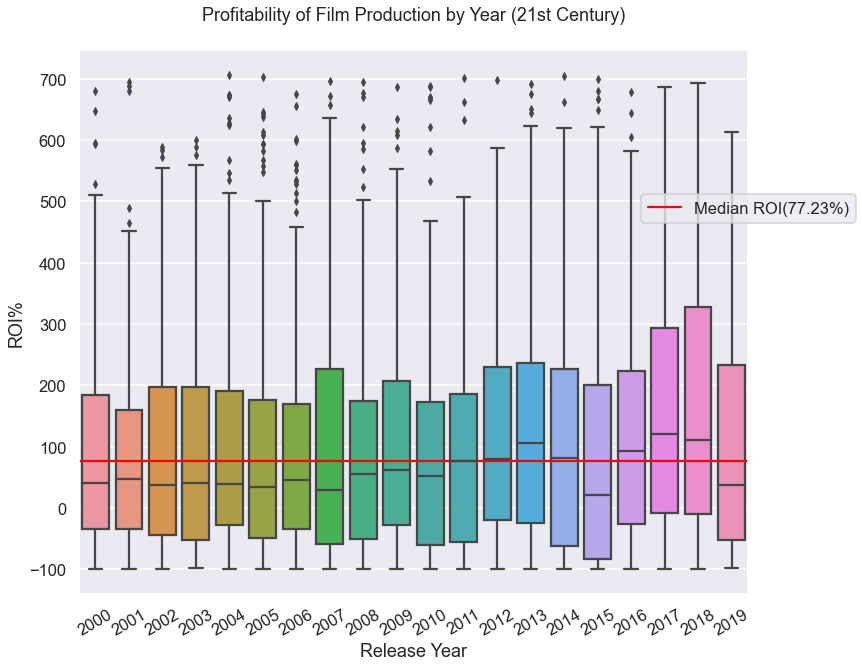

In [10]:
ROI_fig, ROI_ax = plt.subplots(figsize=(12,10))


box_plot = sns.boxplot(
    x=dfSubsetROI['release_year'],
    y=dfSubsetROI['ROI'], 
    data=dfSubsetROI, 
    width=0.8,
    ax=ROI_ax)

ROI_ax.set_title('Profitability of Film Production by Year (21st Century)', fontsize=18, pad=30)
ROI_ax.set_xlabel('Release Year')
ROI_ax.set_ylabel('ROI%')
plt.xticks(rotation=30)


#horizontal line at median
plt.axhline(y=df_tn_bom['ROI'].median(), color='r', linestyle='-', label='Median ROI(77.23%)')
#create and position legend
ROI_ax.legend(bbox_to_anchor = (1.0, 0.75), loc = 'upper center')

plt.savefig('./images/film_Profitability.png', dpi=150, bbox_inches='tight')

plt.show()

In [11]:
df_tn_bom['ROI'].median()

77.225

In [12]:
#display a table for median values by year
#median used as best prediction for returns
dfSubsetROI.groupby('release_year')['ROI'].median()

release_year
2000     40.905
2001     47.330
2002     36.850
2003     40.205
2004     38.800
2005     34.650
2006     45.770
2007     29.885
2008     56.040
2009     61.870
2010     52.340
2011     76.245
2012     80.170
2013    106.340
2014     81.990
2015     21.550
2016     93.465
2017    120.800
2018    111.520
2019     37.360
Name: ROI, dtype: float64

### Budget vs ROI

<AxesSubplot:xlabel='production_budget', ylabel='Count'>

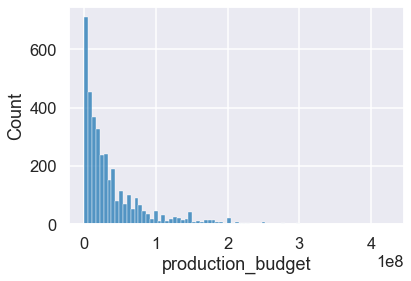

In [13]:
sns.histplot(dfSubsetROI['production_budget'])

A preliminary peak at the production_budget data revealed a very heavily skewed distribution of budgets. With such an intense right skew, I decided to to split the data by low and high budget films in order to try to achieve more normalized data and to answer some important questions related to film budgets and returns on investment. 

After establishing the idea of creating a film as a financially responsible decision for a large buisness, how much money needs to be spent to make this possible? If the data says to expect nearly 80% returns on initial investments, would it make sense to use a large sum of cash to just produce a large amount of low budget films? Would that be more profitable than just focusing on a single large budget film? 

**2. How much money should Microsoft expect to spend? How does the cost of a film relate to expected returns? How should money be allocated to ensure the best chance for success?**


In [14]:
#Split data at the median to observe distrubtion of data for low budget vs high budget films
#median was chosen to get similar sized datasets for low and high budget films


low_budget = dfSubsetROI.loc[dfSubsetROI['production_budget'] <  (df_tn_bom['production_budget'].median()), 'ROI']
high_budget = dfSubsetROI.loc[dfSubsetROI['production_budget'] > (df_tn_bom['production_budget'].median()), 'ROI']

print(f'There are {len(low_budget)} low-budget films and {len(high_budget)} high_budget films.') 

There are 1670 low-budget films and 1892 high_budget films.


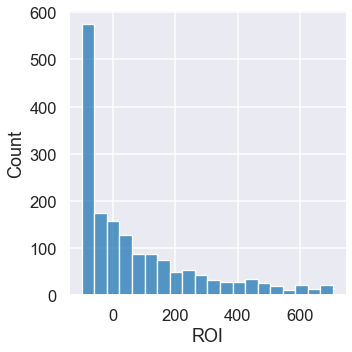

In [15]:
sns.displot(low_budget, kde=False) #quick visualization of low budget films

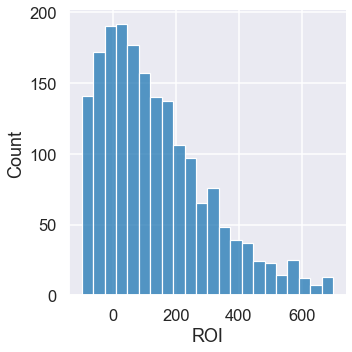

In [16]:
sns.displot(high_budget, kde=False) #quick visualization of high budget distrubtion

In [17]:
df_tn_bom['production_budget'].median()

20000000.0

Before moving on with further analysis, I would like to expand more on what is considered a low budget film and what is considered a high budget film. 

I decided it would make sense to split between high budget and low budget on the median budget value of $20,000,000 for the full dataset.

As a reminder, here is the question posed at the beginning of the notebook:

**2. How much money should Microsoft expect to spend? How does the cost of a film relate to expected returns? How should money be allocated to ensure the best chance for success?**

The figure below for the distrubtion of Low Budget and High Budget films contains a lot of information to discuss.
By stacking the two distrubitions, a quick glance can easily show that the distrubtion for high budget films is closer to being normally distrubited, with a much less extreme right skew when compared to low budget films. 

By clearly labeling the median values for each set, another important interpretation of the data can be made in a glance. With a median value a little under zero for low budget films (~0.56\%), it is expected that a little more than half of all movies in the dataset for low budget movies resulted in a net loss. In fact, calculating the percentage of low budget films with a negative ROI supported this (50.24\% of all low budget films resulted in a loss). 

Essentially, when it comes to lower budget movies, you are not much better off flipping a coin to determibe if your film will be profitable or not. Therefore, the strategy of buying a lot of low budget films with a large sum of money is not the best decision financially. Should that large sum of money be used for a high budget film if low budget films are not the way to go?

Well, a quick glance at the figure would say that it is absolutely a sound financial decision to invest in a large budget movie vs a handful of smaller budget films. With a median value at nearly 100\% expected Return on Investment, when it comes to investing in a large budget film you are likely to double your initial investment!

However, it is important to keep in mind that even though the skew is a little less intense for high budget films, the data is still not normally distrubited. By calculating the percentage of high budget films with a ROI less than zero, it is revealed that nearly a quarter of all high budget films do not succeed financially (24.41\% of high budget films in the dataset have a negative ROI\%).  Still, a little over 75\% success rate is much better than a coin flip and the returns are potetionally lucrative.


Thus, if Microsoft wants the best chance to make a financially succesfull movie, they should expect to pay more than $20,000,000 dollars for their films and expect to spend that amount of money on one large investment instead of a large number of smaller ones. 



/Users/dylandey/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


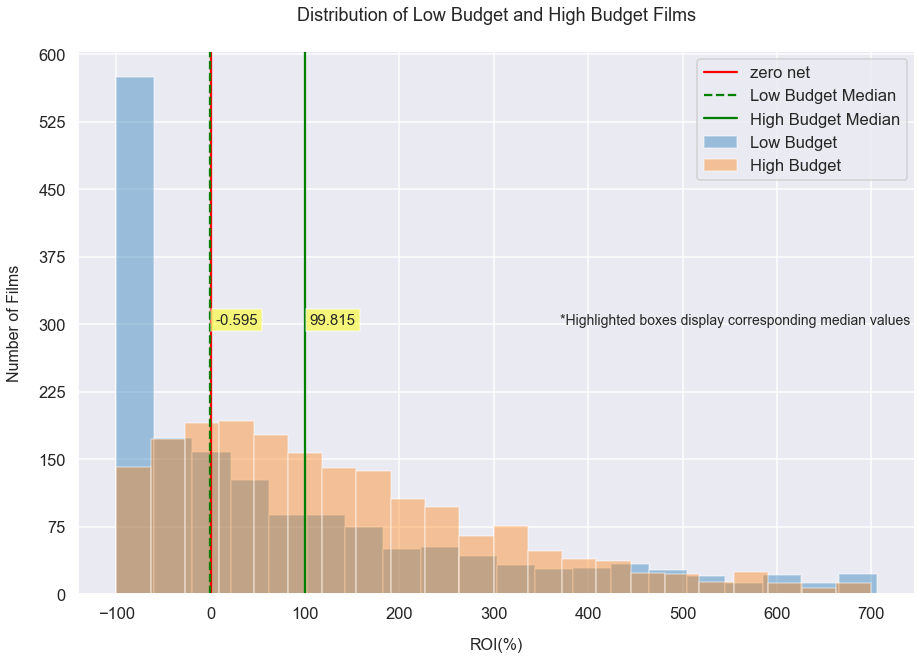

In [41]:

dist_figure = plt.figure(figsize=(15,10))

# Add a subplot to the figure - a new axes
axd = dist_figure.add_subplot(111)

sns.distplot(low_budget, kde=False, ax=axd, label='Low Budget')
sns.distplot(high_budget, kde=False, ax=axd, label='High Budget')

plt.axvline(x=0, color='r', linestyle='-', label='zero net')  #create vertical line at x=0
#create vertical lines to highlight different ROI median values
plt.axvline(x=low_budget.median(), color='g', linestyle='--', label='Low Budget Median')
plt.axvline(x=high_budget.median(), color='g', linestyle='-', label='High Budget Median')

yticks = np.linspace(start=0, stop=600, num=9)

plt.yticks(yticks);
plt.legend();

#create text boxes to label vertical lines
plt.text(x=105, y= 300, s="99.815", fontsize=15, bbox=dict(facecolor='yellow', alpha=0.5))
plt.text(x=5, y= 300, s="-0.595", fontsize=15, bbox=dict(facecolor='yellow', alpha=0.5))
plt.text(x=370, y=300, s='*Highlighted boxes display corresponding median values', fontsize=14)

plt.title('Distribution of Low Budget and High Budget Films', fontsize=18, pad=30)
plt.xlabel('ROI(%)', fontsize=16, labelpad=16)
plt.ylabel('Number of Films', fontsize=16, labelpad=16)



plt.savefig("./images/low_vs_high.png", dpi=150)

plt.show();

In [19]:
df_tn_bom['production_budget'].median()

20000000.0

In [20]:
low_budget_df = dfSubsetROI.loc[dfSubsetROI['production_budget'] < (df_tn_bom['production_budget'].median())]
high_budget_df = dfSubsetROI.loc[dfSubsetROI['production_budget'] > (df_tn_bom['production_budget'].median())] 

In [21]:
low_budget

2129   -16.25
2131    50.74
2132   -22.07
2133   -70.74
2134   -68.77
        ...  
4036   -80.13
4037   -95.99
4038   -49.07
4041   -87.14
4042   -73.24
Name: ROI, Length: 1670, dtype: float64

In [22]:
lowB_percent_loss = (len(low_budget_df.loc[low_budget_df['ROI'] < 0, 'ROI']) / len(low_budget))*100
highB_percent_loss = (len(high_budget_df.loc[high_budget_df['ROI'] < 0, 'ROI']) / len(high_budget))*100
print(lowB_percent_loss)
print(highB_percent_loss)

50.23952095808383
24.418604651162788


In [23]:
print(len(high_budget_df.loc[high_budget_df['ROI'] > 0, 'ROI']) / len(high_budget)*100)
display(high_budget.describe())
low_budget.describe()

75.5813953488372


count    1892.000000
mean      134.805698
std       169.855964
min       -99.950000
25%         2.257500
50%        99.815000
75%       228.575000
max       699.330000
Name: ROI, dtype: float64

count    1670.000000
mean       75.583263
std       199.042298
min       -99.990000
25%       -82.680000
50%        -0.595000
75%       167.005000
max       706.240000
Name: ROI, dtype: float64

### ROI vs Time(Months) for High Budget Films

Now that it has been established that spending money on a high budget film makes more financial sense than spending money a low budget film, further exploration of high budget films has been carried out below. By focusing on the subset of high budget films, further insights can be gained to increase the chances of success even further. 

**3. When should Microsoft release a new movie?**

In [24]:
monthly_ROI_medians = list(high_budget_df.groupby('release_month')['ROI'].median())
monthly_ROI_medians

[64.035,
 91.29,
 86.07,
 58.305,
 166.37,
 141.23,
 133.72500000000002,
 94.73,
 40.97,
 57.92,
 103.7,
 107.565]

The figure below plots the expected return on investment percentages categorized by month as a quick visual representation of what time of the year to best release a new high budget film. A line plot of median ROI values for each month was overlayed to help visualize the cyclic nature of movie release dates.

I expect further analysis of the distrubition of customers by age would be interesting to see. I was unable to include this analysis here. I expect a large percentage of typical movie goers are limited by their school schedules from seeing films doing certain times of the year. Indeed, there are many more factors invovled in the seasonality of films, i.e disposable income fluctuation, seasonal film festival/film rewards etc. 

Whatever the reason for the seasonality of movie release financial success, it is at least clear WHEN Microsoft should release it's film based on the data I have at my disposal. 

The best time for Microsoft to have the best chance at financial success for new movies would either be late spring to mid summer (May-July) or for the winter holiday months (November and December). Expected returns for releasing a large budget film for either of these timeframes are over 100%. 

This is the last figure looking at ROI%. Next, we will be switching gears to look at what films audiences enjoy the most.

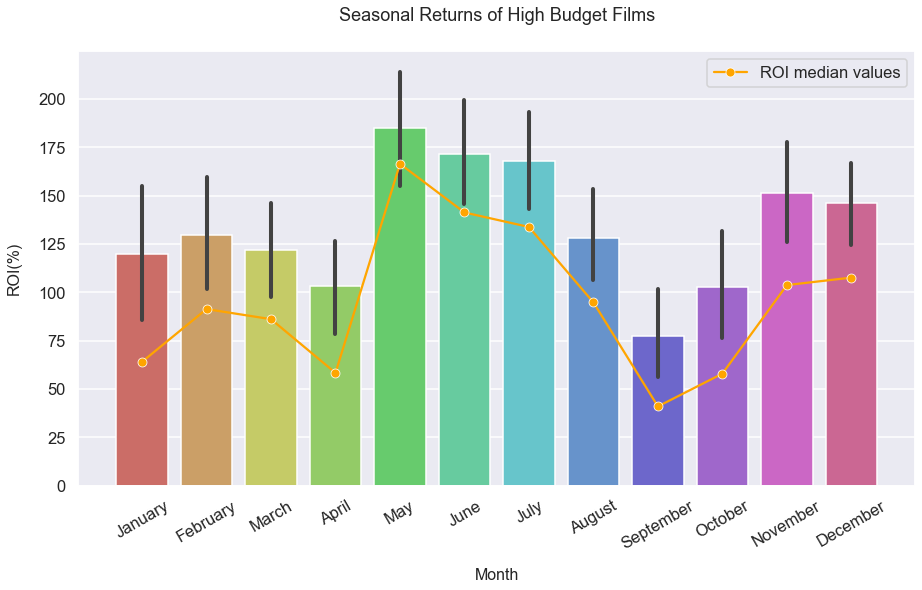

In [25]:
season_figure = plt.figure(figsize=(15,8))

# Add a subplot to the figure - a new axes
axs = season_figure.add_subplot(111)

sns.barplot(x='release_month', y='ROI', data=high_budget_df, 
            palette='hls', ax=axs)



num_words = list(range(0,12))
word_months = ['January', 'February', 'March', 'April',
              'May', 'June', 'July', 'August', 'September',
              'October', 'November', 'December']

plt.xticks(num_words, word_months, rotation=30);

sns.lineplot(x=num_words, y=monthly_ROI_medians, marker='o', color='orange', label='ROI median values');



plt.title('Seasonal Returns of High Budget Films', fontsize=18, pad=30)
plt.xlabel('Month', fontsize=16, labelpad=16)
plt.ylabel('ROI(%)', fontsize=16, labelpad=16)


plt.legend();

plt.savefig("./images/high_seasons.png", dpi=150)
plt.show();

In [26]:
summer_break = monthly_ROI_medians[5:8]
winter_break = monthly_ROI_medians[10:12]

print(f' Median return for summer break: {sum(summer_break) / len(summer_break)}')
print(f' Median return for winter holidays: {sum(winter_break) / len(winter_break)}')

 Median return for summer break: 123.22833333333335
 Median return for winter holidays: 105.6325


### Top 250 IMDb Movies

In [27]:
genres = pd.read_csv('cleanedData/genreCounts')

In [28]:
ls cleanedData 

IMDb_weighted.csv       genreCounts             top250_writers.csv
cleanedBOM.csv          mergedBudgetTables.csv  top250df.csv
cleanedTN.csv           top250_directors.csv


In [29]:
#Determine overall genre makeup of top films
#keep only top ten genres
genres_10 = genres.sort_values(by='genre_count', ascending=False)
genres_10.reset_index(inplace=True)
genres_10.iloc[:10]

,index,genre,genre_count
0,3,Drama,160
1,0,Action,79
2,1,Adventure,66
3,6,Comedy,58
4,8,Thriller,46
5,5,Biography,40
6,11,Crime,37
7,2,Sci-Fi,29
8,15,Mystery,23
9,10,Animation,22


The below figure shows the different genres of the top 250 Movies of the 21st century. Please reference the data exploration notebook in the repository to see how the process for compiling this data. 

A lot of the films in the top 250 list can be described by multiple genres. However, it is still useful to see what genre elements compose the top films in determining a theme for creating a ppular movie.

A very large portion of the films that compose the top 250 list can be describes as containing elements of the Drama genre, at 64% of the data included. Nearly a third of the films can be described as containing Action genre elements and about quarter of the top movies can be described as containing elements of an adventure movie. 

Microsoft should focus on movies that contain elements of a drama, action, and adventure, with a large emphasis on drama in order to increase their chances of releasing a popular movie.

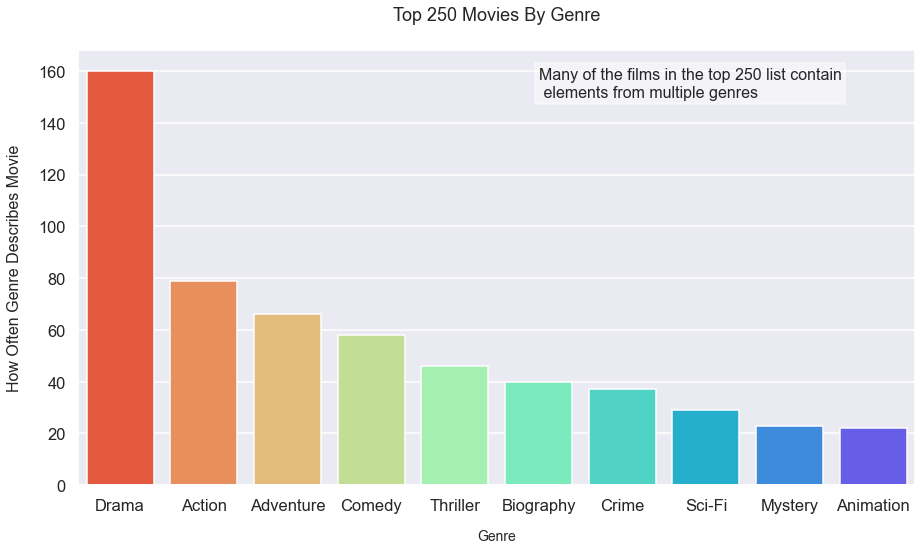

In [30]:
genre_figure = plt.figure(figsize=(15,8))

# Add a subplot to the figure - a new axes
axg = genre_figure.add_subplot(111)

sns.barplot(x='genre', y='genre_count', data=genres_10.iloc[:10], 
             ax=axg, palette='rainbow_r')





plt.title('Top 250 Movies By Genre', fontsize=18, pad=30)
plt.xlabel('Genre', fontsize=14, labelpad=16)
plt.ylabel('How Often Genre Describes Movie', fontsize=16, labelpad=16)

txtBox=dict(facecolor='white', alpha=0.5)
message = "Many of the films in the top 250 list contain\n elements from multiple genres"

axg.text(5, 150, message, fontsize=16, bbox=txtBox)

plt.savefig("./images/top_genres.png", dpi=150)
plt.show();

### Popular Staff

Below I have created a couple of visualizations for who contributed the most to the top 250 movie list in an effort to determine what staff to hire to make the most popular film. 

Top Directors: Denis Villeneuve, Christopher Nolan, Joe Russo/Anthony Russo 
Top Writers: Jack Kirby, Stan Lee, Michael Arndt, Christopher Markus, Jane Goldman, Stephen McFeely        

In [31]:
directors = pd.read_csv('cleanedData/top250_directors.csv')

In [32]:
director_counts = directors['primary_name'].value_counts()

In [33]:
director_counts.head(12)

Denis Villeneuve     5
Anthony Russo        4
Christopher Nolan    4
Joe Russo            4
Matthew Vaughn       3
Chad Stahelski       3
Peter Jackson        3
Martin Scorsese      3
Steven Spielberg     3
David Fincher        3
Wes Anderson         3
Ethan Coen           2
Name: primary_name, dtype: int64

In [34]:
best_directors_index = director_counts.loc[director_counts > 2].index
best_directors = director_counts.loc[director_counts > 2]

In [35]:
writers = pd.read_csv('cleanedData/top250_writers.csv')

In [36]:
writer_counts = writers['primary_name'].value_counts()

In [37]:
writer_counts.head(20)

Jack Kirby            5
Stan Lee              5
Michael Arndt         4
Stephen McFeely       4
Jane Goldman          4
Christopher Markus    4
Philippa Boyens       3
J.R.R. Tolkien        3
Pierre Boulle         3
Derek Kolstad         3
Guillermo del Toro    3
Bruce Geller          3
Fran Walsh            3
Amanda Silver         3
Vijayendra Prasad     3
Rick Jaffa            3
Ritesh Shah           3
Taylor Sheridan       2
Parveez Sheikh        2
Zak Penn              2
Name: primary_name, dtype: int64

In [38]:
best_writers_index = writer_counts.loc[writer_counts > 2].index
best_writers = writer_counts.loc[writer_counts > 2]

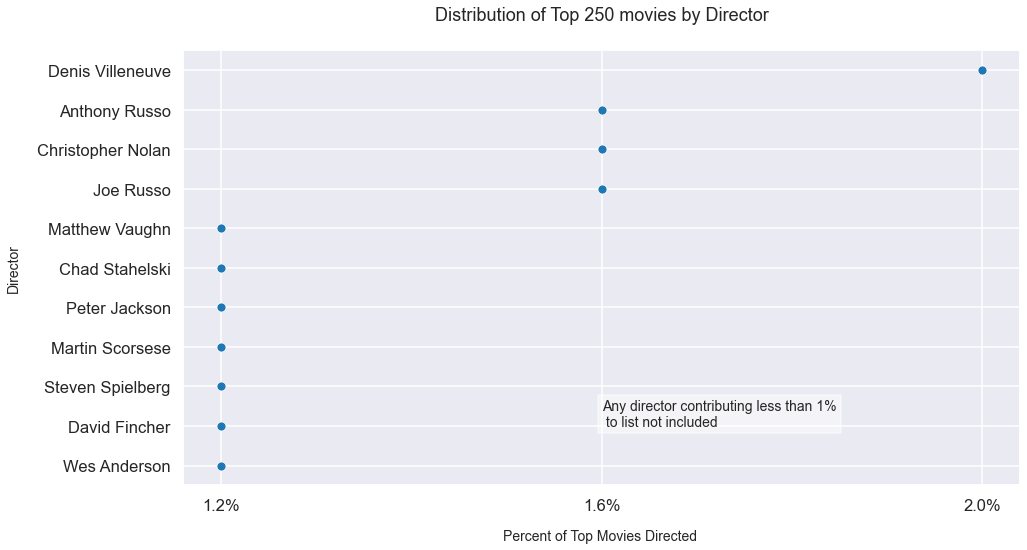

In [39]:
director_figure = plt.figure(figsize=(15,8))

# Add a subplot to the figure - a new axes
axd = director_figure.add_subplot(111)

sns.scatterplot(x=best_directors, y=best_directors_index)





plt.title('Distribution of Top 250 movies by Director', fontsize=18, pad=30)
plt.xlabel('Percent of Top Movies Directed ', fontsize=14, labelpad=16)
plt.ylabel('Director', fontsize=14, labelpad=16)
plt.xticks([3,4,5], ['1.2%','1.6%','2.0%'])

txtBox2=dict(facecolor='white', alpha=0.5)
message2 = "Any director contributing less than 1%\n to list not included"

axd.text(4, 9, message2, fontsize=14, bbox=txtBox2)


plt.show();

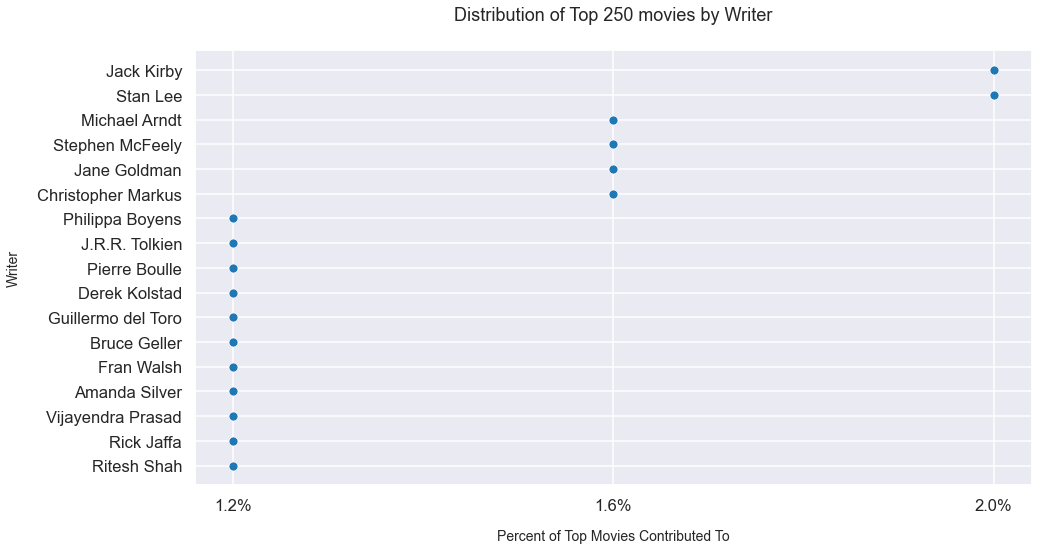

In [40]:
writer_figure = plt.figure(figsize=(15,8))

# Add a subplot to the figure - a new axes
axw = writer_figure.add_subplot(111)

sns.scatterplot(x=best_writers, y=best_writers_index)





plt.title('Distribution of Top 250 movies by Writer', fontsize=18, pad=30)
plt.xlabel('Percent of Top Movies Contributed To', fontsize=14, labelpad=16)
plt.ylabel('Writer', fontsize=14, labelpad=16)
plt.xticks([3,4,5], ['1.2%','1.6%','2.0%'])

txtBox2=dict(facecolor='white', alpha=0.5)
message2 = "Any writer contributing less than 1%\n to list not included"

axd.text(4, 9, message2, fontsize=14, bbox=txtBox2)


plt.show();

## Conclusions
Overall, it is riskier to get into the movie studio buisness than it was at the beginning of the 2010s. That being said, there is still a good financial incentive for Microsoft to enter the field right now, keeping in mind the following recommendations: 

* Focus on large budget films and be prepared to spend more than $20,000,000 per film. Although lower budget movies can have impressive ROI returns, they are more likely to fail than larger budget movies. 
* Plan to release movies towards the beginning of summer, or during the winter holidays. Avoid releasing movies at the beginning of the year or during the fall. 
* Focus on creating a film with elements of Drama, Action, and Adventure as they tend to be recieved well by the public as compared to other genres. 




### Next steps


Include more consumer side analysis. Who is the major target audience? 

Gain more insight into lower budget movies and make further recommendations if high budget films are unnatainable. 

Including analysis of the rotten tomato dataset could reveal some insights about how critical acclaim affects the financial success of movies.

Including analysis of the TMDb Dataset with focus on the unique feature of 'popularity' can be used to support some of my findings and to explore the data even further.

By using the OMDb API, it would be possible to gain insight on how the success of a movie relates to their associated posters, but it was beyond the scope of this project.
